In [1230]:
from seaborn import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [1231]:
df = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/Assignment 1 - Titanic/train.csv')
df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/AI in Business/Assignment 1 - Titanic/test.csv')


In [1232]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1233]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1235]:
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)


In [1236]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

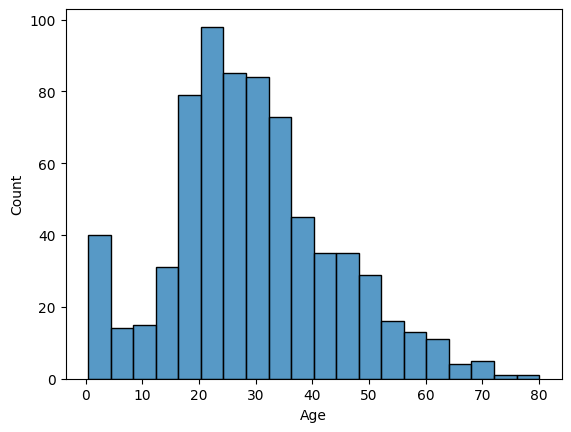

In [1237]:
sns.histplot(data=df, x='Age')

In [1238]:
df['Age'].mean()

29.69911764705882

In [1239]:
df.groupby('Sex')['Age'].mean()


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [1240]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1241]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [1242]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1243]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [1244]:
df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646


In [1245]:
df['Pclass'].unique()

array([3, 1, 2])

In [1246]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [1247]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})

In [1248]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,2
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [1249]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.441268,0.523008,0.381594,32.204208,1.361392
std,257.353842,0.486592,0.836071,0.477990,13.018747,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [1250]:
df['Child'] = ((df['Age'] < 16)).astype(int)
df['Elder'] = ((df['Age'] > 60)).astype(int)


In [1251]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder
0,1,0,3,1,22.0,1,0,7.2500,1,0,0
1,2,1,1,2,38.0,1,0,71.2833,2,0,0
2,3,1,3,2,26.0,0,0,7.9250,1,0,0
3,4,1,1,2,35.0,1,0,53.1000,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,0


In [1252]:
df_death = df.groupby('Survived').agg({'Survived': 'sum',
                                       'Age': 'mean',
                                       'Fare': 'mean',
                                       'SibSp': 'mean',
                                       'Parch': 'mean',
                                       'Child': 'sum',
                                        'Elder': 'sum',
                                       'Embarked': lambda x: x.mode()[0],
                                       'Pclass': lambda x: x.mode()[0]})


In [1253]:
df_death.head()

,Survived,Age,Fare,SibSp,Parch,Child,Elder,Embarked,Pclass
Survived,,,,,,,,,
0,0,30.193989,22.117887,0.553734,0.329690,34,17,1,3
1,342,28.232953,48.395408,0.473684,0.464912,49,5,1,1


In [1254]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder
0,1,0,3,1,22.0,1,0,7.2500,1,0,0
1,2,1,1,2,38.0,1,0,71.2833,2,0,0
2,3,1,3,2,26.0,0,0,7.9250,1,0,0
3,4,1,1,2,35.0,1,0,53.1000,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,0


In [1255]:
df_men = df[df['Sex']== 1]
df_women = df[df['Sex']== 2]
df_child = df[df['Child']== 1]
df_Elder = df[df['Elder']== 1]

In [1256]:
df_men_survived_0 = df_men[df_men['Survived'] == 0]
men_death_rate = (len(df_men_survived_0) / len(df_men)) * 100
print("Male Death Rate:", men_death_rate)

df_women_survived_0 = df_women[df_women['Survived'] == 0]
women_death_rate = (len(df_women_survived_0) / len(df_women)) * 100
print("Female Death Rate:", women_death_rate)

df_child_survived_0 = df_child[df_child['Survived'] == 0]
child_death_rate = (len(df_child_survived_0) / len(df_child)) * 100
print("Child Death Rate:", child_death_rate)

df_Elder_survived_0 = df_Elder[df_Elder['Survived'] == 0]
Elder_death_rate = (len(df_Elder_survived_0) / len(df_Elder)) * 100
print("Elder Death Rate:", Elder_death_rate)


Male Death Rate: 81.10918544194108
Female Death Rate: 25.796178343949045
Child Death Rate: 40.963855421686745
Elder Death Rate: 77.27272727272727


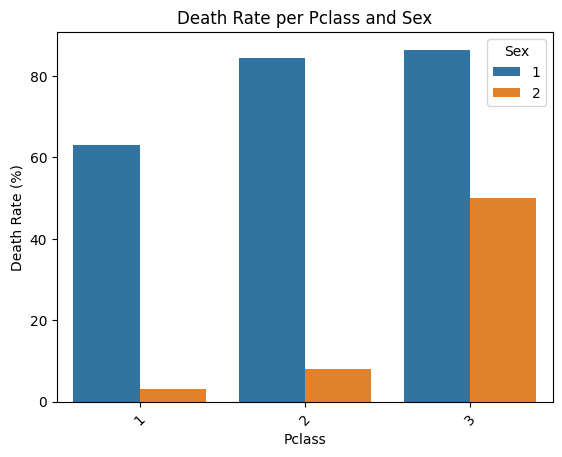

In [1257]:
death_rate_per_pclass = df.groupby(['Pclass', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)

sns.barplot(x=death_rate_per_pclass.index.get_level_values(0), y=death_rate_per_pclass.values, hue=death_rate_per_pclass.index.get_level_values(1))
plt.xlabel('Pclass')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Pclass and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


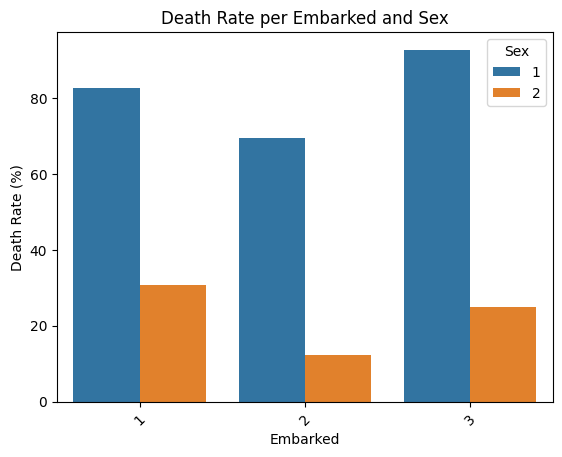

In [1258]:
death_rate_per_embarked = df.groupby(['Embarked', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
sns.barplot(x=death_rate_per_embarked.index.get_level_values(0), y=death_rate_per_embarked.values, hue=death_rate_per_embarked.index.get_level_values(1))
plt.xlabel('Embarked')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Embarked and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()





In [1259]:
death_rate_per_SibSp = df.groupby('SibSp')['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
print(death_rate_per_SibSp)

SibSp
0     65.460526
1     46.411483
2     53.571429
3     75.000000
4     83.333333
5    100.000000
8    100.000000
Name: Survived, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

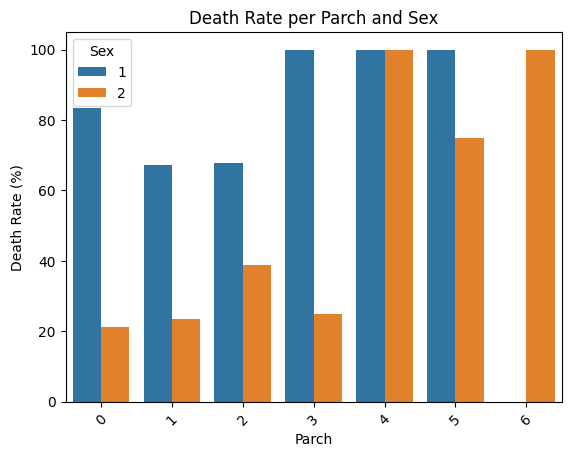

In [1260]:
death_rate_per_Parch = df.groupby(['Parch', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
sns.barplot(x=death_rate_per_Parch.index.get_level_values(0), y=death_rate_per_Parch.values, hue=death_rate_per_Parch.index.get_level_values(1))
plt.xlabel('Parch')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Parch and Sex')
plt.xticks(rotation=45)


In [1261]:
df['Fam_Size'] = df['SibSp'] + df['Parch'] + 1

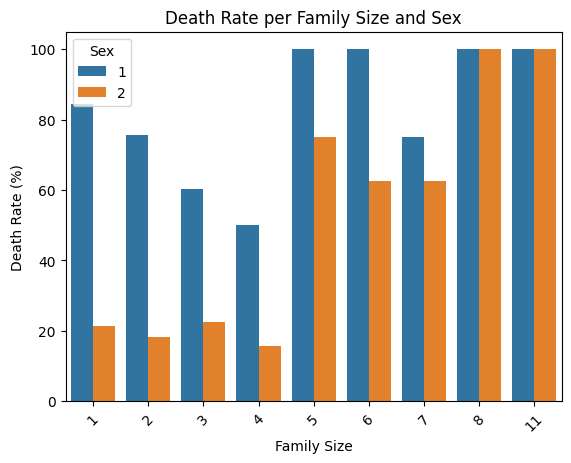

In [1262]:
death_rate_per_Fam_Size = df.groupby(['Fam_Size', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
sns.barplot(x=death_rate_per_Fam_Size.index.get_level_values(0), y=death_rate_per_Fam_Size.values, hue=death_rate_per_Fam_Size.index.get_level_values(1))
plt.xlabel('Family Size')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Family Size and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')


In [1263]:
df['Alone'] = ((df['Fam_Size'] == 1)).astype(int)
df['Big_Family'] = ((df['Fam_Size'] > 4)).astype(int)

In [1264]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder,Fam_Size,Alone,Big_Family
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,2,0,0
1,2,1,1,2,38.0,1,0,71.2833,2,0,0,2,0,0
2,3,1,3,2,26.0,0,0,7.9250,1,0,0,1,1,0
3,4,1,1,2,35.0,1,0,53.1000,1,0,0,2,0,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,0,1,1,0


In [1265]:
def calculate_family_size_risk(row):
    if row['Sex'] == 2:
        if row['Fam_Size'] < 5:
            return 1
        elif 5 <= row['Fam_Size'] <= 7:
            return 2
        else:
            return 3
    elif row['Sex'] == 1:
        if row['Fam_Size'] == 1 or row['Fam_Size'] >= 5:
            return 3
        else:
            return 2

df['Family_Size_Risk'] = df.apply(calculate_family_size_risk, axis=1)


In [1266]:
death_rate_per_family_size_risk = df.groupby('Family_Size_Risk')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
print(death_rate_per_family_size_risk)


Family_Size_Risk
1    20.284698
2    67.878788
3    85.393258
Name: Survived, dtype: float64


In [1267]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,2,0,0,2
1,2,1,1,2,38.0,1,0,71.2833,2,0,0,2,0,0,1
2,3,1,3,2,26.0,0,0,7.9250,1,0,0,1,1,0,1
3,4,1,1,2,35.0,1,0,53.1000,1,0,0,2,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,1,0,0,1,1,0,3


In [1268]:
bin_ranges = [0, 5, 10, 15, 30, 40, 50, 60, 70, 80]  # Adjust the bin ranges as desired
labels = range(1, len(bin_ranges))  # Assign labels 1, 2, 3, 4, 5, and so on
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_ranges, labels=labels)


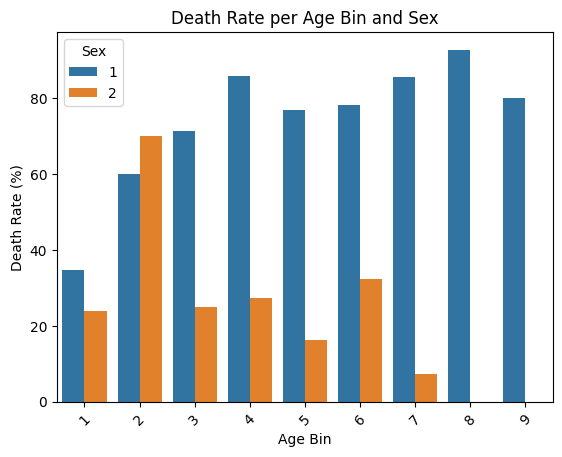

In [1269]:
death_rate_per_age_bin_sex = df.groupby(['Age_Bin', 'Sex'])['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_age_bin_sex.index.get_level_values(0), y=death_rate_per_age_bin_sex.values, hue=death_rate_per_age_bin_sex.index.get_level_values(1))
plt.xlabel('Age Bin')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Age Bin and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


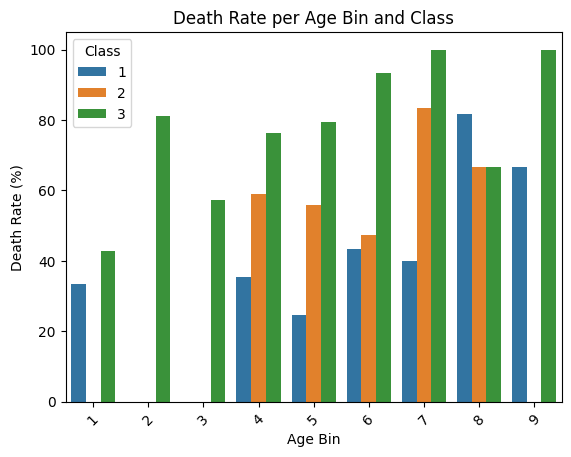

In [1270]:
death_rate_per_age_bin_class = df.groupby(['Age_Bin', 'Pclass'])['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_age_bin_class.index.get_level_values(0), y=death_rate_per_age_bin_class.values, hue=death_rate_per_age_bin_class.index.get_level_values(1))
plt.xlabel('Age Bin')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Age Bin and Class')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [1271]:
def calculate_age_class_risk(row):
    if row['Pclass'] == 1:
        if row['Age'] < 15:
            return 1
        elif 15 <= row['Age'] <= 60:
            return 2
        elif 60 < row['Age'] <= 70:
            return 3
        elif row['Age'] > 70:
            return 2
    elif row['Pclass'] == 2:
        if row['Age'] < 15:
            return 1
        elif 15 <= row['Age'] <= 50:
            return 2
        elif row['Age'] > 50:
            return 3
    elif row['Pclass'] == 3:
        if 5 <= row['Age'] <= 10 or row['Age'] > 15:
            return 3
        else:
            return 2
    else:
        return None


df['Class_Age_Risk'] = df.apply(calculate_age_class_risk, axis=1)


In [1272]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,2,0,0,2,4,3
1,2,1,1,2,38.0,1,0,71.2833,2,0,0,2,0,0,1,5,2
2,3,1,3,2,26.0,0,0,7.9250,1,0,0,1,1,0,1,4,3
3,4,1,1,2,35.0,1,0,53.1000,1,0,0,2,0,0,1,5,2
4,5,0,3,1,35.0,0,0,8.0500,1,0,0,1,1,0,3,5,3


In [1273]:
def calculate_sex_age_risk(row):
    if row['Sex'] == 2 and row['Age'] > 50:
        return 1
    elif row['Sex'] == 2 and (5 <= row['Age'] <= 10 or 40 <= row['Age'] <= 50):
        return 3
    elif row['Sex'] == 1 and row['Age'] < 10:
        return 1
    elif row['Sex'] == 1 and (15 <= row['Age'] <= 30 or row['Age'] > 50):
        return 3
    else:
        return 2


df['Sex_Age_Risk'] = df.apply(calculate_sex_age_risk, axis=1)


In [1274]:
df['Risk_Level'] = df['Class_Age_Risk'] + df['Sex_Age_Risk'] + df['Family_Size_Risk'] - 1

In [1275]:
death_rate_per_risk_level = df.groupby('Risk_Level')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
print(death_rate_per_risk_level)


Risk_Level
3     3.333333
4     6.474820
5    43.016760
6    78.947368
7    83.417085
8    89.565217
Name: Survived, dtype: float64


In [1276]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk,Sex_Age_Risk,Risk_Level
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.0,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,1.352413,29.441268,0.523008,0.381594,32.204208,1.361392,0.093154,0.024691,1.904602,0.602694,0.069585,2.184063,NaN,2.509540,2.432099,6.125701
std,257.353842,0.486592,0.836071,0.477990,13.018747,1.102743,0.806057,49.693429,0.635673,0.290811,0.155270,1.613459,0.489615,0.254589,0.884202,NaN,0.551473,0.596471,1.539707
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,3.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN,2.000000,2.000000,5.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,NaN,3.000000,2.000000,6.000000
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,NaN,3.000000,3.000000,8.000000


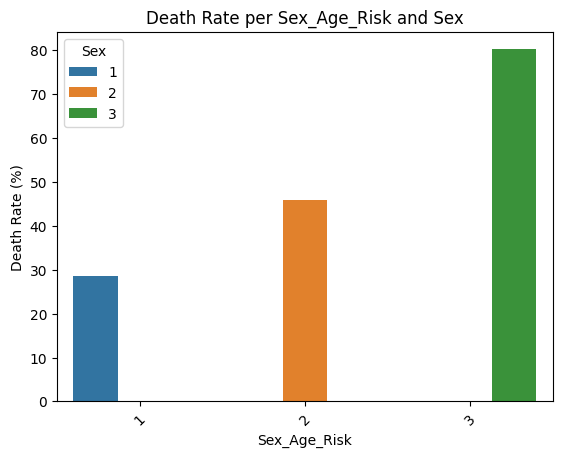

In [1277]:
death_rate_per_sex_age_risk = df.groupby('Sex_Age_Risk')['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)
sns.barplot(x=death_rate_per_sex_age_risk.index, y=death_rate_per_sex_age_risk.values, hue=death_rate_per_sex_age_risk.index)
plt.xlabel('Sex_Age_Risk')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Sex_Age_Risk and Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [1278]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Elder,Fam_Size,Alone,Big_Family,Family_Size_Risk,Age_Bin,Class_Age_Risk,Sex_Age_Risk,Risk_Level
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,2,0,0,2,4,3,3,7
1,2,1,1,2,38.0,1,0,71.2833,2,0,0,2,0,0,1,5,2,2,4
2,3,1,3,2,26.0,0,0,7.9250,1,0,0,1,1,0,1,4,3,2,5
3,4,1,1,2,35.0,1,0,53.1000,1,0,0,2,0,0,1,5,2,2,4
4,5,0,3,1,35.0,0,0,8.0500,1,0,0,1,1,0,3,5,3,2,7


Main takeaways so far: Being a 3rd class adult male with a large family size, or traveling alone, has a dramatically higher chance of death.

In [1279]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Child', 'Elder', 'Fam_Size', 'Alone', 'Big_Family',
       'Family_Size_Risk', 'Age_Bin', 'Class_Age_Risk', 'Sex_Age_Risk',
       'Risk_Level'],
      dtype='object')

In [1280]:
cat_columns = ['Pclass', 'Sex', 'Embarked', 'Child', 'Elder',  'Age_Bin', 'Risk_Level', 'Alone', 'Big_Family']
num_columns = ['Fare', 'Fam_Size']
target = 'Survived'

In [1281]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [1282]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns),
                                               ('num', num_transformer, num_columns)])


In [1283]:
# Create a logistic regression model with preprocessor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8268156424581006


In [1284]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model with preprocessor
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', DecisionTreeClassifier())])

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the accuracy
print("Decision Tree Accuracy:", accuracy_tree)


Decision Tree Accuracy: 0.7877094972067039


In [1285]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', RandomForestClassifier())])

rf_model.fit(X_train, y_train)

rf_predict = rf_model.predict(X_test)


In [1286]:
# Access the random forest classifier
rf_classifier = rf_model.named_steps['classifier']

# Get feature importances
importances = rf_classifier.feature_importances_

# If your preprocessor changes feature names, retrieve them
feature_names = X_train.columns

# Combine feature names and their importance scores
feature_importances = zip(feature_names, importances)

# Sort the features by their importance
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: Elder, Importance: 0.11157460846876449
Feature: Child, Importance: 0.11071785181778006
Feature: Embarked, Importance: 0.03473185511048553
Feature: Pclass, Importance: 0.023436502147766318
Feature: Sex, Importance: 0.014910674874027132
Feature: Age_Bin, Importance: 0.014598893876900715
Feature: Risk_Level, Importance: 0.014395138249983558
Feature: Fare, Importance: 0.012293648023812996
Feature: Big_Family, Importance: 0.011230387492007794
Feature: Alone, Importance: 0.007577662239045074
Feature: Fam_Size, Importance: 0.0020789280080695857
